<a href="https://colab.research.google.com/github/mfmarlonferrari/NietzscheLLM/blob/main/IntroLLMTransformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Alimentando a máquina -  O problema do Encoding

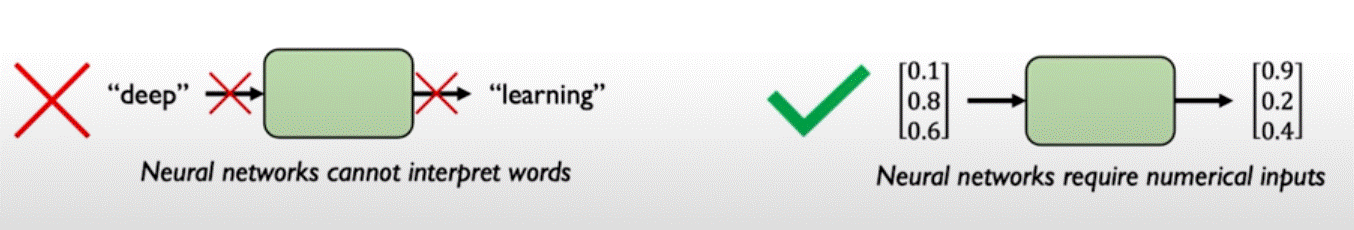

In [ ]:
texto = 'hoje você está focado em aprender!'
caracteres = sorted(list(set(texto)))
print(caracteres)
print('Tamanho do seu vocabulário >> ', len(caracteres))

[' ', '!', 'a', 'c', 'd', 'e', 'f', 'h', 'j', 'm', 'n', 'o', 'p', 'r', 's', 't', 'v', 'á', 'ê']
Tamanho do seu vocabulário >>  19


In [ ]:
letraParaIndex = { lt:i for i,lt in enumerate(caracteres) }
IndexParaLetra = { i:lt for i,lt in enumerate(caracteres) }

encode = lambda s: [letraParaIndex[c] for c in s] # encoder
decode = lambda l: ''.join([IndexParaLetra[i] for i in l]) # decoder

print(encode("vamos aprender"))
print(decode(encode("vamos aprender")))

[16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5, 13]
vamos aprender


### Encoding por palavras

In [ ]:
import pandas as pd
import numpy as np

texto = {'texto':[
    'você está começando a aprender Transformer',
    'talvez você esteja começando a gostar',
]}
texto = pd.DataFrame(texto)
texto

,texto
0,você está começando a aprender Transformer
1,talvez você esteja começando a gostar


In [ ]:
texto["texto"].str.get_dummies(" ")

,Transformer,a,aprender,começando,esteja,está,gostar,talvez,você
0,1,1,1,1,0,1,0,0,1
1,0,1,0,1,1,0,1,1,1


### Complexidade

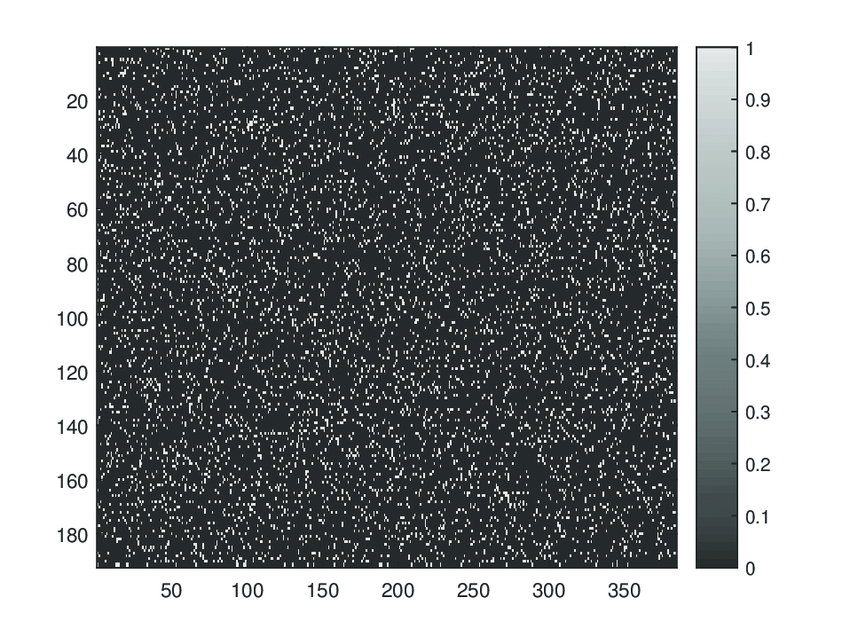

### Tokenização eficiente
https://github.com/openai/tiktoken

In [ ]:
!pip install tiktoken

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.9 MB/s eta 0:00:00


In [ ]:
import tiktoken
enc = tiktoken.get_encoding("gpt2")
enc.encode('vamos aprender transformers')

[85, 321, 418, 2471, 13287, 6121, 364]

In [ ]:
#Nosso encoder improvisado
print(encode('vamos aprender transformers'))

[16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5, 13, 0, 15, 13, 2, 10, 14, 6, 11, 13, 9, 5, 13, 14]


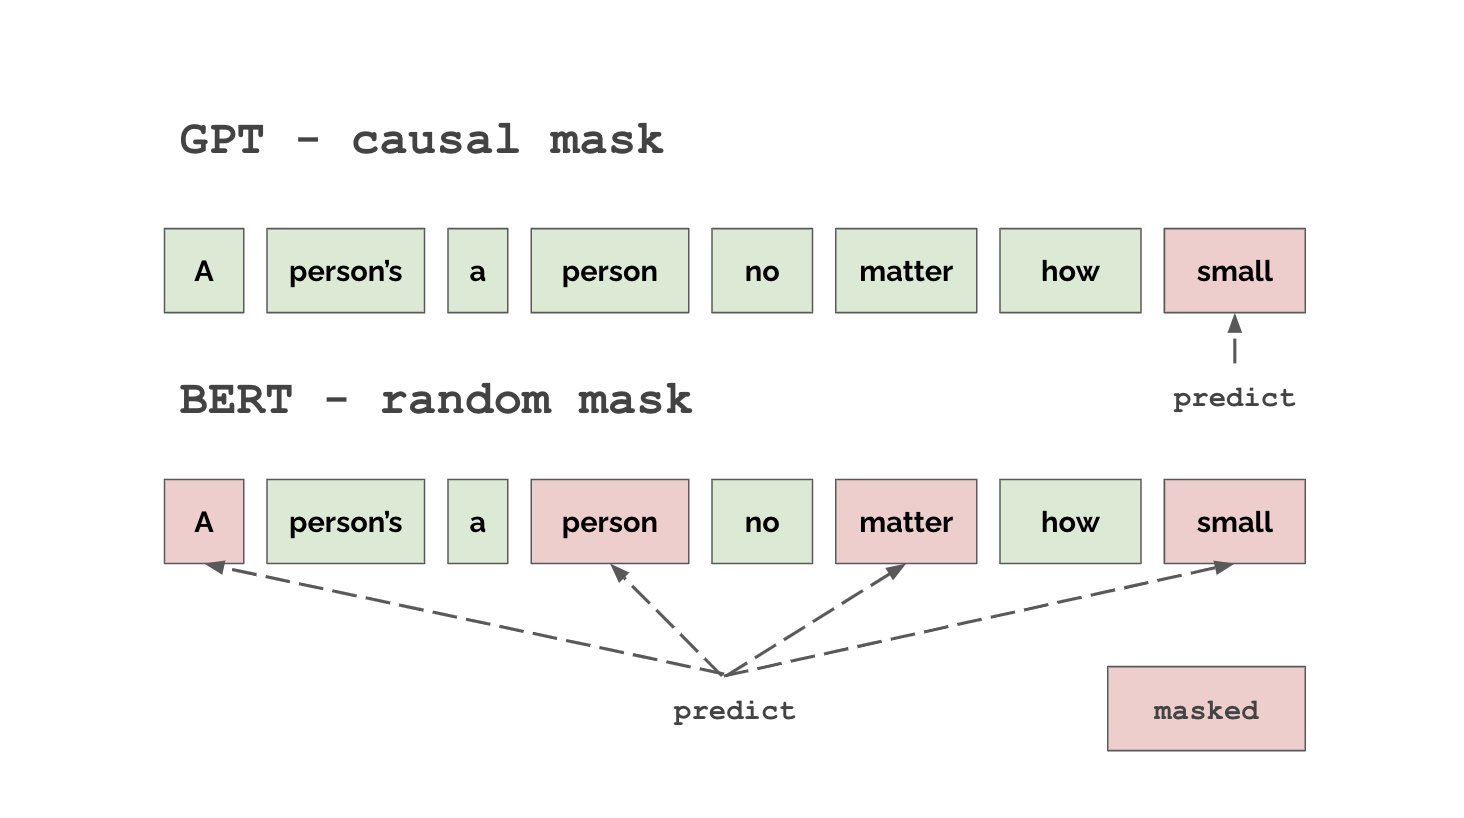

### Qual a tarefa? Compreender a próxima sequência baseado na anterior!

In [ ]:
texto = encode('vamos aprender transformers')
len(texto)
print(texto)

[16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5, 13, 0, 15, 13, 2, 10, 14, 6, 11, 13, 9, 5, 13, 14]


## GPT

In [ ]:
for i in range(len(texto)-1):
  x = texto[:i]
  y = texto[i]
  if x != []:
    print(f'Quando os dados forem: {x} o alvo é {y}')

Quando os dados forem: [16] o alvo é 2
Quando os dados forem: [16, 2] o alvo é 9
Quando os dados forem: [16, 2, 9] o alvo é 11
Quando os dados forem: [16, 2, 9, 11] o alvo é 14
Quando os dados forem: [16, 2, 9, 11, 14] o alvo é 0
Quando os dados forem: [16, 2, 9, 11, 14, 0] o alvo é 2
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2] o alvo é 12
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12] o alvo é 13
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12, 13] o alvo é 5
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12, 13, 5] o alvo é 10
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10] o alvo é 4
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4] o alvo é 5
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5] o alvo é 13
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5, 13] o alvo é 0
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5, 13, 0] o alvo é 15
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 

## BERT

In [ ]:
from random import randint

for i in range(len(texto)):
  x = texto
  y = texto.copy()
  idx_mask = randint(0,len(texto)-1)
  y[idx_mask] = '<mask>'
  print(f'Quando os dados forem: {x} o alvo é {y}')

Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5, 13, 0, 15, 13, 2, 10, 14, 6, 11, 13, 9, 5, 13, 14] o alvo é [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5, 13, 0, 15, 13, 2, '<mask>', 14, 6, 11, 13, 9, 5, 13, 14]
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5, 13, 0, 15, 13, 2, 10, 14, 6, 11, 13, 9, 5, 13, 14] o alvo é [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5, 13, 0, 15, 13, 2, 10, 14, 6, 11, '<mask>', 9, 5, 13, 14]
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5, 13, 0, 15, 13, 2, 10, 14, 6, 11, 13, 9, 5, 13, 14] o alvo é [16, 2, 9, 11, 14, '<mask>', 2, 12, 13, 5, 10, 4, 5, 13, 0, 15, 13, 2, 10, 14, 6, 11, 13, 9, 5, 13, 14]
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5, 13, 0, 15, 13, 2, 10, 14, 6, 11, 13, 9, 5, 13, 14] o alvo é [16, 2, 9, 11, 14, 0, 2, 12, '<mask>', 5, 10, 4, 5, 13, 0, 15, 13, 2, 10, 14, 6, 11, 13, 9, 5, 13, 14]
Quando os dados forem: [16, 2, 9, 11, 14, 0, 2, 12, 13, 5, 10, 4, 5, 13

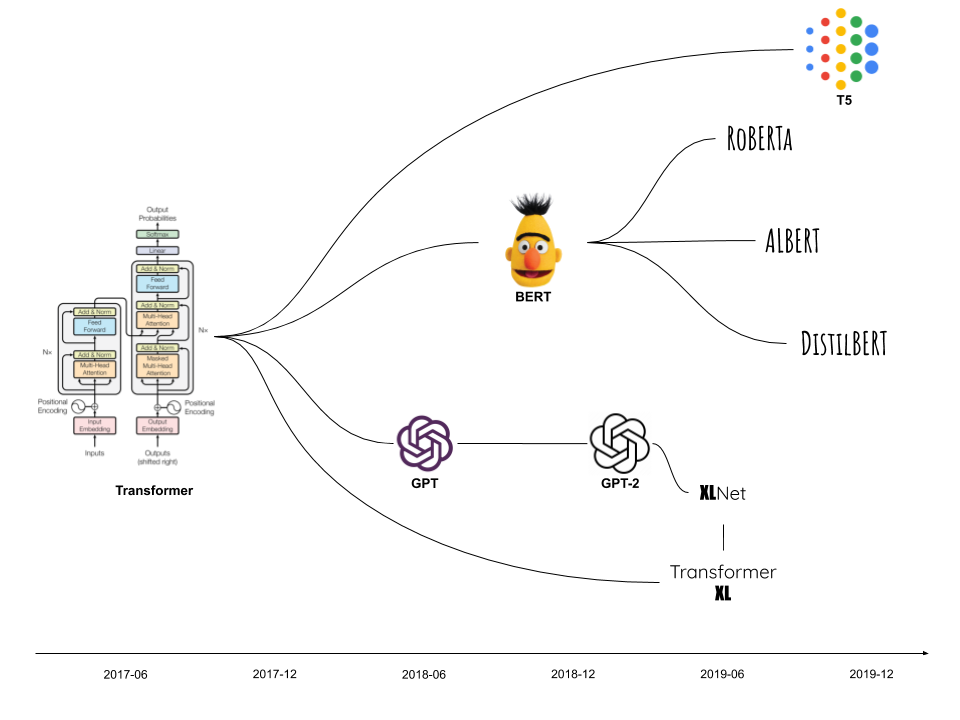

#Mãos à obra

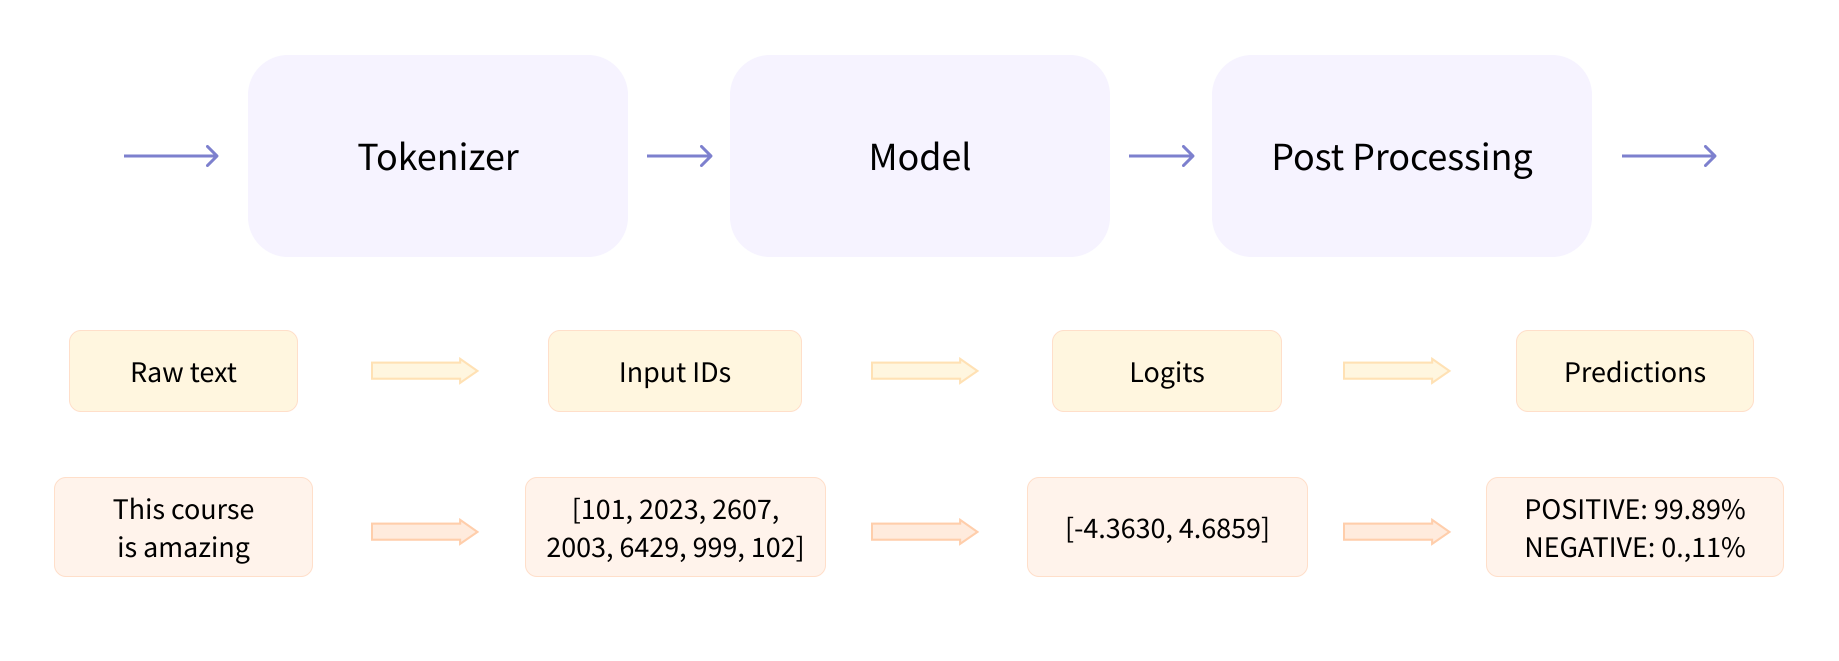

### Passo 1. Criando um tokenizer

In [ ]:
#https://huggingface.co/
!pip install transformers[torch]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 94.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 92.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 26.3 MB/s eta 0:00:00


In [ ]:
#precisamos de um corpus bem robusto, porém não tão gigante
!wget -O ./sample_data/crepusculoDosIdolos.txt https://raw.githubusercontent.com/mfmarlonferrari/NietzscheLLM/main/crepusculoDosIdolos.txt

--2023-06-09 02:25:54--  https://raw.githubusercontent.com/mfmarlonferrari/NietzscheGPT/main/crepusculoDosIdolos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162098 (158K) [text/plain]
Saving to: ‘./sample_data/crepusculoDosIdolos.txt’

./sample_data/crepu 100%[===================>] 158.30K  --.-KB/s    in 0.006s  

2023-06-09 02:25:54 (26.5 MB/s) - ‘./sample_data/crepusculoDosIdolos.txt’ saved [162098/162098]



In [ ]:
PATH = './sample_data/'
dados_treino = 'crepusculoDosIdolos.txt'

In [ ]:
from tokenizers import ByteLevelBPETokenizer

# Initialize a ByteLevelBPETokenizer
tokenizer = ByteLevelBPETokenizer()
tokenizer.train(files=[PATH+dados_treino], vocab_size=52_000, min_frequency=2, special_tokens=[
    "<s>",
    "<pad>",
    "</s>",
    "<unk>",
    "<mask>",
])

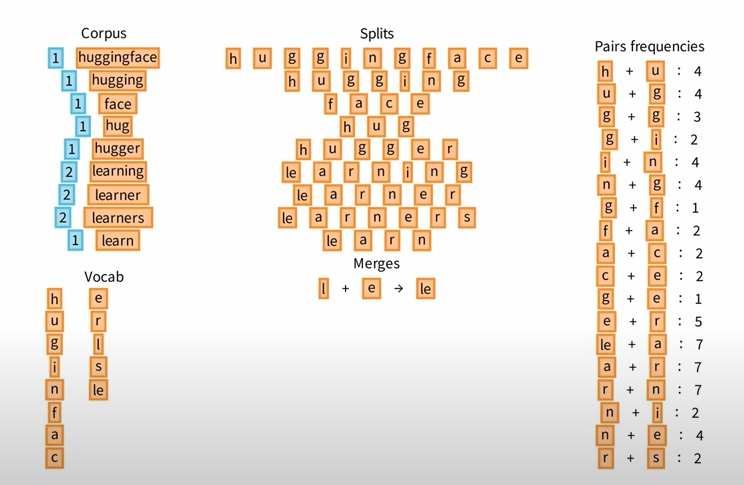

In [ ]:
#alguns testes
tokenizer.encode("Hoje é um novo dia!").ids

[44, 83, 570, 306, 300, 1714, 556, 5]

In [ ]:
tokenizer.decode([44, 83, 570, 306, 300, 1714, 556, 5])

'Hoje é um novo dia!'

In [ ]:
#neste momento, nosso modelo já possui um tokenizer construído a partir dos dados
#vocab.json, lista dos tokens ordenados por frequência - converte tokens para IDs 
#merges.txt - mapeia textos para tokens

!rm -r ./sample_data/RAW_MODEL
!mkdir ./sample_data/RAW_MODEL
tokenizer.save_model(PATH+'RAW_MODEL')

rm: cannot remove './sample_data/RAW_MODEL': No such file or directory


['./sample_data/RAW_MODEL/vocab.json', './sample_data/RAW_MODEL/merges.txt']

### Passo 2. Construindo nosso Tokenizer

In [ ]:
#Usando nosso tokenizer
#https://huggingface.co/docs/transformers/tokenizer_summary

from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained(PATH+'RAW_MODEL', max_len=512)

### Passo 3. Criando nosso Transformer

In [ ]:
from transformers import RobertaConfig

config = RobertaConfig(
    vocab_size=52_000,
    max_position_embeddings=512,
    num_attention_heads=12,
    num_hidden_layers=6,
    type_vocab_size=1,
)

from transformers import RobertaForMaskedLM
model = RobertaForMaskedLM(config=config)

In [ ]:
# quantos parâmetros tem nossa rede neural
model.num_parameters()

83502880

### Passo 4. Criando nosso Dataset tokenizado

In [ ]:
#forma simples de se carregar um arquivo bruto como Dataset
from transformers import LineByLineTextDataset

dataset = LineByLineTextDataset(
    tokenizer=tokenizer,
    file_path=PATH+dados_treino,
    block_size=128,
)

/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:119: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [ ]:
# verificando
dataset.examples[:2]

[{'input_ids': tensor([   0,   69,  276, 1154,  341,  306,  277,  273,   73,  271,  446, 1058,
            18,  352,   35, 1155,  262, 1058,  300,  527, 2240,   35,    2])},
 {'input_ids': tensor([   0,   83,  358, 1142, 3664, 1816,  272,  687, 2688,  781, 4651,  315,
          2377,  271, 2768, 1635,  285,  811, 2375,  527,    2])}]

In [ ]:
tokenizer.decode(dataset.examples[7]['input_ids'])

'<s>na escola bélica da vida — o que não me faz morrer me torna mais forte.</s>'

### Passo 5. Treinando o modelo

In [ ]:
'''
Data Collators são estratégias de se construir lotes de dados 
para treinar o modelo. Cria listas de amostras a partir do dataset e 
permite que o Pytorch aplique a backpropagation adequadamente.
Probability = probabilidade de mascarar tokens da entrada
'''
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.1
)

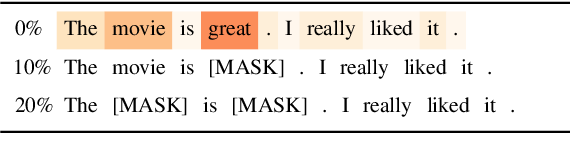

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir=PATH+'RAW_MODEL',
    overwrite_output_dir=True,
    num_train_epochs=1200,
    per_device_train_batch_size=64,
    save_steps=10_000,
    save_total_limit=2,
    prediction_loss_only=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset,
)

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,6.558300
1000,5.239500
1500,4.259200
2000,3.279100
2500,2.418700
3000,1.741300
3500,1.246500
4000,0.929700


Step,Training Loss
500,6.558300
1000,5.239500
1500,4.259200
2000,3.279100
2500,2.418700
3000,1.741300
3500,1.246500
4000,0.929700
4500,0.749400


TrainOutput(global_step=4800, training_loss=2.7951911799112956, metrics={'train_runtime': 1215.2549, 'train_samples_per_second': 223.163, 'train_steps_per_second': 3.95, 'total_flos': 8992119855513600.0, 'train_loss': 2.7951911799112956, 'epoch': 1200.0})

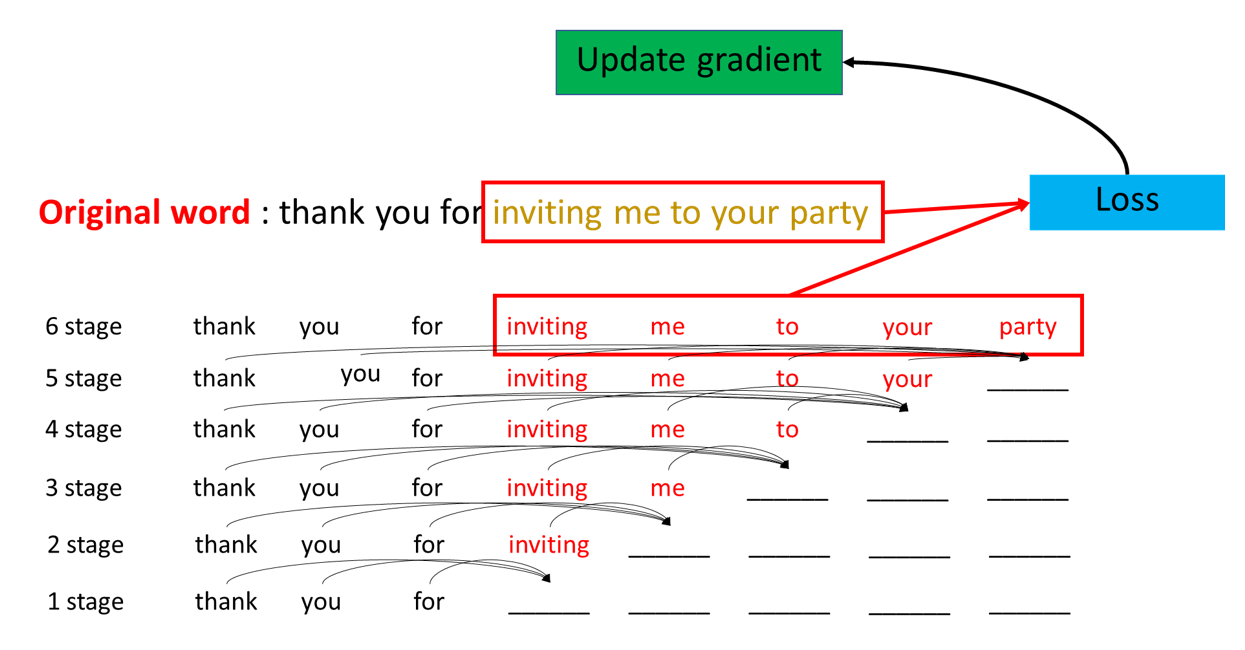

In [ ]:
trainer.save_model(PATH+'RAW_MODEL')

### Passo 6. Testando o modelo

In [ ]:
from transformers import pipeline

fill_mask = pipeline(
    "fill-mask",
    model=PATH+'RAW_MODEL',
    tokenizer=PATH+'RAW_MODEL'
)

In [ ]:
texto = 'Digo que o amor é <mask>'
fill_mask(texto)

[{'score': 0.033809125423431396,
  'token': 334,
  'token_str': ' os',
  'sequence': 'Digo que o amor é os'},
 {'score': 0.017626747488975525,
  'token': 600,
  'token_str': ' entre',
  'sequence': 'Digo que o amor é entre'},
 {'score': 0.016663571819663048,
  'token': 547,
  'token_str': ' vontade',
  'sequence': 'Digo que o amor é vontade'},
 {'score': 0.01561195682734251,
  'token': 300,
  'token_str': ' um',
  'sequence': 'Digo que o amor é um'},
 {'score': 0.015040758065879345,
  'token': 459,
  'token_str': ' moral',
  'sequence': 'Digo que o amor é moral'}]

In [ ]:
texto = 'O <mask> da moral: basear na lógica dos fracos'
fill_mask(texto)

[{'score': 0.248663991689682,
  'token': 800,
  'token_str': ' erro',
  'sequence': 'O erro da moral: basear na lógica dos fracos'},
 {'score': 0.2376711368560791,
  'token': 276,
  'token_str': ' o',
  'sequence': 'O o da moral: basear na lógica dos fracos'},
 {'score': 0.050119392573833466,
  'token': 262,
  'token_str': ' a',
  'sequence': 'O a da moral: basear na lógica dos fracos'},
 {'score': 0.029156992211937904,
  'token': 338,
  'token_str': ' por',
  'sequence': 'O por da moral: basear na lógica dos fracos'},
 {'score': 0.015538261272013187,
  'token': 265,
  'token_str': 'os',
  'sequence': 'Oos da moral: basear na lógica dos fracos'}]

In [ ]:
texto = 'Digo-lhes: <mask> é uma dama e um oponente.'
fill_mask(texto)

[{'score': 0.8917146921157837,
  'token': 262,
  'token_str': ' a',
  'sequence': 'Digo-lhes: a é uma dama e um oponente.'},
 {'score': 0.004398603457957506,
  'token': 695,
  'token_str': ' virtude',
  'sequence': 'Digo-lhes: virtude é uma dama e um oponente.'},
 {'score': 0.0035164454020559788,
  'token': 1063,
  'token_str': 'ou',
  'sequence': 'Digo-lhes:ou é uma dama e um oponente.'},
 {'score': 0.002945131855085492,
  'token': 315,
  'token_str': ' da',
  'sequence': 'Digo-lhes: da é uma dama e um oponente.'},
 {'score': 0.0028344306629151106,
  'token': 1780,
  'token_str': ' escrever',
  'sequence': 'Digo-lhes: escrever é uma dama e um oponente.'}]